In [16]:
import numpy as np
import matplotlib.pyplot as plt

Q1. find the QR decompositon of the matrix A using the Gram-Schmidt process, modified_gram_schmidt and Householder reflectors and find the loss of orthogonality.

In [17]:
# Custom function to round to 5 digits
round_digits = lambda x: np.round(x, 5)

### Classical Gram-Schmidt (CGS)
def gram_schmidtqr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]  # Take j-th column of A
        for i in range(j):
            R[i, j] = round_digits(np.dot(Q[:, i].T, v))
            v = v - round_digits(R[i, j] * Q[:, i])
        R[j, j] = round_digits(np.linalg.norm(v))
        Q[:, j] = round_digits(v / R[j, j])

    return Q, R



### Modified Gram-Schmidt (MGS)
def modified_gram_schmidt_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]  # Take j-th column of A
        R[j, j] = round_digits(np.linalg.norm(v))
        Q[:, j] = round_digits(v / R[j, j])
        for i in range(j + 1, n):
            R[j, i] = round_digits(np.dot(Q[:, j].T, A[:, i]))
            A[:, i] = A[:, i] - round_digits(R[j, i] * Q[:, j])  # Modify orthogonally

    return Q, R

### Householder QR Decomposition
def householderqr(A):
    m, n = A.shape
    Q = np.eye(m) 
    R = A.copy()   

    for k in range(n):
        x = round_digits(R[k:m, k]) 
        e1 = np.zeros_like(x)
        e1[0] = round_digits(np.linalg.norm(x))  
        v = round_digits(x + np.sign(x[0]) * e1)  
        v = round_digits(v / np.linalg.norm(v))  

        # Create Householder reflection matrix H
        H = np.eye(m)
        H[k:m, k:m] -= round_digits(2.0 * np.outer(v, v))

        R = round_digits(np.dot(H, R))  
        Q = round_digits(np.dot(Q, H))  

    return Q, R


In [18]:

A = np.array([[0.70000, 0.70711], 
              [0.70001, 0.70711]])
U_1,S_1,VT_1 = np.linalg.svd(A)
print("singular value of A {}\n".format(S_1))
print("Condition number of A {}\n".format(S_1[0]/S_1[1]))
Q_CGS, R_CGS = gram_schmidtqr(A)
Q_House, R_House = householderqr(A)
Q_MGS, R_MGS = modified_gram_schmidt_qr(A)
print("CGS \n Q {} ".format(Q_CGS))
print("\n R {} ".format(R_CGS))
print( "\n Loss of orthogonality: {}".format(np.linalg.norm(np.dot(Q_CGS.T, Q_CGS) - np.eye(2), ord='fro')))
print("========================================")
print("Householder \n Q {} ".format(Q_House))
print("\n R {} ".format(R_House))
print( "\n Loss of orthogonality: {}".format(np.linalg.norm(np.dot (Q_House, Q_House.T) - np.eye(2)), ord='fro'))
print("========================================")
print("MGS \n Q {} ".format(Q_MGS))
print("\n R {} ".format(R_MGS))
print( "\n Loss of orthogonality: {}".format(np.linalg.norm(np.dot(Q_MGS.T, Q_MGS) - np.eye(2), ord='fro'))
)


singular value of A [1.40713294e+00 5.02518263e-06]

Condition number of A 280016.27812909795

CGS 
 Q [[0.7071  1.     ]
 [0.70711 0.     ]] 

 R [[9.8996e-01 1.0000e+00]
 [0.0000e+00 1.0000e-05]] 

 Loss of orthogonality: 0.9999904099667057
Householder 
 Q [[-0.70711  0.70712]
 [-0.70712 -0.7071 ]] 

 R [[-9.89970e-01 -1.00002e+00]
 [ 1.00000e-05  1.00000e-05]] 

 Loss of orthogonality: 2.6894118325280188e-05
MGS 
 Q [[0.7071  1.     ]
 [0.70711 0.     ]] 

 R [[9.8996e-01 1.0000e+00]
 [0.0000e+00 1.0000e-05]] 

 Loss of orthogonality: 0.9999904099667057


Q2. find the solution of a least square problem using different methods (ex 1. QR deomposition using Modified Gram-Schmidt, and Householder reflection and 2. SVD decomposition, 3. Cholesky decomposition, 4. Normal equation)

In [19]:
### Householder QR Decomposition (full QR decomposition) ###
def householderQR(A):
    m, n = A.shape
    Q = np.eye(m)  # Initialize Q as identity matrix
    R = A.copy()   # Initialize R as A

    for k in range(n):
        x = R[k:m, k] 
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x)  
        v = (x + np.sign(x[0]) * e1)  
        v = (v / np.linalg.norm(v))  

        # Create Householder reflection matrix H
        H = np.eye(m)
        H[k:m, k:m] -= 2.0 * np.outer(v, v)

        R = (np.dot(H, R))  
        Q = (np.dot(Q, H))  

    return Q, R

In [20]:
# Modified Gram-Schmidt (reduced Factorization)
def modified_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    
    A_copy = A.copy()  # Make a copy of A if you want to preserve the original matrix

    for j in range(n):
        v = A_copy[:, j]  # Take j-th column of A_copy
        R[j, j] = np.linalg.norm(v)
        
        if R[j, j] == 0:
            raise ValueError(f"Zero column encountered at index {j}, leading to a division by zero.")
        
        Q[:, j] = v / R[j, j]
        
        for i in range(j + 1, n):
            R[j, i] = np.dot(Q[:, j].T, A_copy[:, i])
            A_copy[:, i] = A_copy[:, i] - R[j, i] * Q[:, j]  # Modify A_copy orthogonally
    
    return Q, R


In [21]:
def BackwardSubstitution(R, b):
    # Solve Rx = b using backward substitution
    x = np.zeros_like(b)
    n = len(b)
    
    for i in range(n - 1, -1, -1):
        if R[i, i] == 0:
            raise ValueError(f"Zero pivot encountered at index {i}.")
        
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    
    return x


In [22]:
def polynomial(x, c):
    p_x = 0
    for i in range(len(c)):
        p_x += c[i] * x**i
    return p_x

In [23]:
def A_matrix(x, n):
    A = np.zeros((len(x), n))
    for i in range(n):
        A[:, i] = x**i
    return A

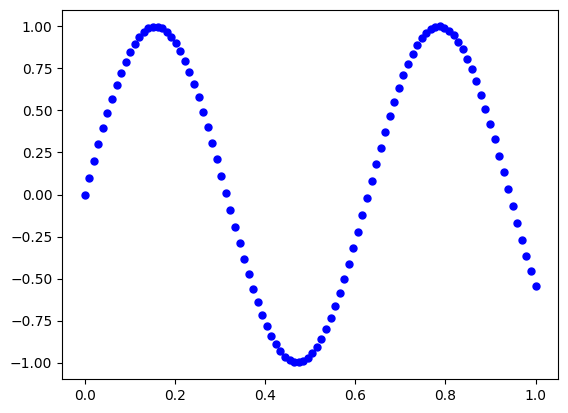

In [24]:
# Define b as sin(10*x) and create the x vector
x = np.linspace(0, 1, 100)
b = np.sin(10*x)
plt.plot(x, b, label='sin(10x)', color='blue', linewidth=0 , markersize=5, marker='o')

In [25]:
# Construct the A matrix for polynomial fitting (degree 14, 15 terms)
A = A_matrix(x, 15)
# Perform QR factorizations
Q_MGS, R_MGS = modified_gram_schmidt(A)
Q_house, R_house = householderQR(A)
Q_house = Q_house[:, :15]
R_house = R_house[:15, :15]
print(Q_house.shape, R_house.shape)
print(Q_MGS.shape, R_MGS.shape)


(100, 15) (15, 15)
(100, 15) (15, 15)


In [26]:
# Ensure b is transformed by Q^T before solving
b_MGS = np.dot(Q_MGS.T, b) 
b_house = np.dot(Q_house.T, b)

# Perform backward substitution to solve for x
x_MGS = BackwardSubstitution(R_MGS[:15, :15], b_MGS[:15])
x_house = BackwardSubstitution(R_house[:15, :15], b_house[:15])

In [27]:

U, S, VT = np.linalg.svd(A)
S = np.eye(VT.shape[0]) * S
U = U[:, :15]
print("{}; {}; {}".format(U.shape, S.shape, VT.shape)) ##Reduced SVD

X_SVD = np.dot(VT.T, np.dot(np.linalg.inv(S), np.dot(U.T, b)))


(100, 15); (15, 15); (15, 15)


In [28]:
# use the numpy lstsq function(true value)
x_lstsq = np.linalg.lstsq(A, b)[0]

#solution using Normal Equations
X_NE = np.linalg.solve(A.T@ A, A.T@ b)
error_NE = np.linalg.norm(np.dot(A,X_NE) - np.dot(A,x_lstsq))



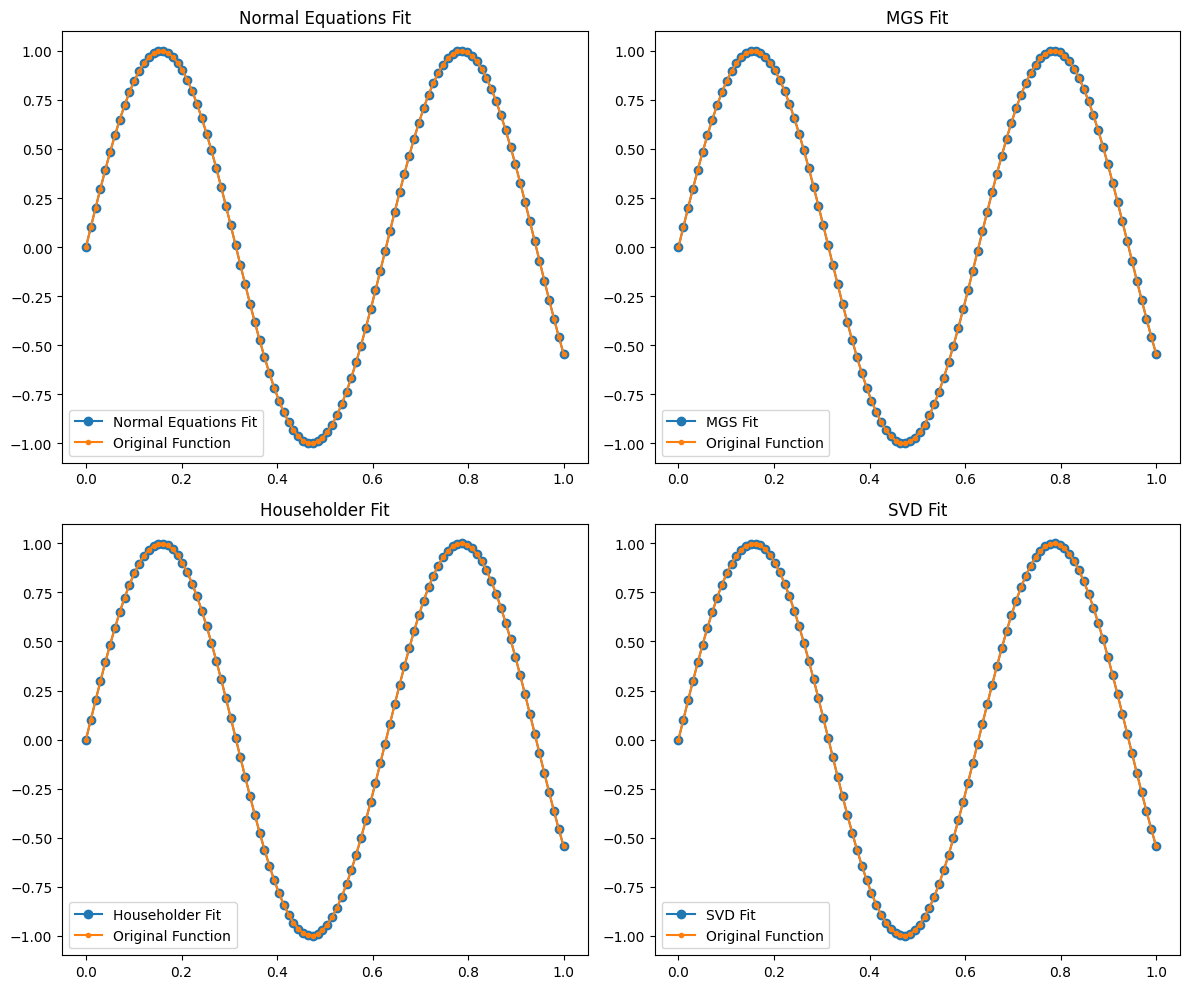

In [29]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Normal Equations Fit
axs[0, 0].plot(x, np.dot(A,X_NE), label="Normal Equations Fit", marker = 'o')
axs[0, 0].plot(x, b, label="Original Function", marker = '.')
axs[0, 0].legend()
axs[0, 0].set_title("Normal Equations Fit")

# Plot MGS Fit
axs[0, 1].plot(x, polynomial(x, x_MGS), label="MGS Fit", marker = 'o')
axs[0, 1].plot(x, b, label="Original Function", marker = '.')
axs[0, 1].legend()
axs[0, 1].set_title("MGS Fit")

# Plot Householder Fit
axs[1, 0].plot(x, polynomial(x, x_house), label="Householder Fit", marker = 'o')
axs[1, 0].plot(x, b, label="Original Function", marker = '.')
axs[1, 0].legend()
axs[1, 0].set_title("Householder Fit")

# Plot SVD Fit
axs[1, 1].plot(x, polynomial(x, X_SVD), label="SVD Fit", marker = 'o')
axs[1, 1].plot(x, b, label="Original Function", marker = '.')
axs[1, 1].legend()
axs[1, 1].set_title("SVD Fit")

plt.tight_layout()
plt.show()


In [30]:
matrix = np.column_stack((x_MGS, x_house, X_SVD, X_NE, x_lstsq))

# Define the header
header = ["x_MGS", "x_house", "X_SVD", "X_NE", "x_lstsq"]

# Print the header
print("{:>20} {:>20} {:>20} {:>20} {:>20}".format(*header))

# Print the matrix with proper formatting in scientific notation
for row in matrix:
    print("{:>20.5e} {:>20.5e} {:>20.5e} {:>20.5e} {:>20.5e}".format(*row))
# Calculate the L2 norms (Euclidean norms)
error_SVD = np.linalg.norm(np.dot(A, X_SVD) - np.dot(A, x_lstsq))
error_house = np.linalg.norm(np.dot(A, x_house) - np.dot(A, x_lstsq))
error_MGS = np.linalg.norm(np.dot(A, x_MGS) - np.dot(A, x_lstsq))
error_NE = np.linalg.norm(np.dot(A, X_NE) - np.dot(A, x_lstsq))
print(" Least Square Error MGS: {} \n Least Square Error House: {} \n Least Square Error SVD: {} \n Least Square Error NE {} ".format(error_MGS, error_house, error_SVD, error_NE))



               x_MGS              x_house                X_SVD                 X_NE              x_lstsq
        -2.21943e-07         -1.60396e-07         -1.60395e-07          1.93349e-05         -1.60395e-07
         1.00001e+01          1.00001e+01          1.00001e+01          9.99457e+00          1.00001e+01
        -4.61558e-03         -3.14923e-03         -3.14923e-03          2.53612e-01         -3.14923e-03
        -1.66575e+02         -1.66611e+02         -1.66611e+02         -1.71380e+02         -1.66611e+02
        -7.44972e-01         -2.95950e-01         -2.95949e-01          4.51810e+01         -2.95949e-01
         8.33924e+02          8.30457e+02          8.30457e+02          5.82784e+02          8.30457e+02
         3.77339e+01          5.52238e+01          5.52239e+01          8.41821e+02          5.52239e+01
        -2.33181e+03         -2.39204e+03         -2.39204e+03         -3.67736e+03         -2.39204e+03
         1.65591e+03          1.80111e+03          1.80